In [2]:
#First we will import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [9]:
#Impoting the excel file into Pandas Dataframe

df = pd.read_excel("/data.xlsx",header=0)

In [10]:
#Take a look at the data

df.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM
0,Apr - 2018,Agriculture,Agri-corporate,Veg&Fruit Prom Council Kerala,Vegetable&Fruit Promo Coun (Kerala),PLAYER 2,Color,48
1,Apr - 2018,Alcoholic Drinks,Liquor,United Spirits Ltd,Mcdowells No1 Mineral Water,PLAYER 1,Black & White,32
2,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 2,Color,4021
3,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Car Rng(Ford India),PLAYER 1,Color,2612
4,Apr - 2018,Auto,Auto-cars,Ford India Pvt Ltd,Ford Freestyle,PLAYER 2,Color,6953


In [11]:
df.dtypes

PERIOD             object
SUPER CATEGORY     object
PRODUCT GROUP      object
ADVERTISER         object
PRODUCT            object
PUBLICATION        object
AD TYPE(CLR/BW)    object
VOL_SQCM            int64
dtype: object

In [14]:
df.shape #Checking the shape of data to know the number of Rows and Columns

(70837, 8)

In [15]:
#Checking for any Missing Values in the data

df.isnull().value_counts()

PERIOD  SUPER CATEGORY  PRODUCT GROUP  ADVERTISER  PRODUCT  PUBLICATION  AD TYPE(CLR/BW)  VOL_SQCM
False   False           False          False       False    False        False            False       70837
dtype: int64

In [17]:
#Taking a detailed look at the featues.

df.describe(include="all")

#We can see the number of unique categories of categorical featues and statistical distribution of numerical features

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM
count,70837,70837,70837,70837,70837,70837,70837,70837.000000
unique,32,27,504,16599,22360,2,2,NaN
top,May - 2018,Education,Ret Auto-cars,Sarathy Auto Cars,Gen-Personal Greetings/Announcements,PLAYER 2,Black & White,NaN
freq,3554,20941,5827,469,128,44681,39750,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1032.327442
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3846.232461
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,510.000000


In [19]:
#Converting the Period string into a pandas datetime object for ploting the trend line.

df['DATE']= pd.to_datetime(df['PERIOD'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70837 entries, 0 to 70836
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   PERIOD           70837 non-null  object        
 1   SUPER CATEGORY   70837 non-null  object        
 2   PRODUCT GROUP    70837 non-null  object        
 3   ADVERTISER       70837 non-null  object        
 4   PRODUCT          70837 non-null  object        
 5   PUBLICATION      70837 non-null  object        
 6   AD TYPE(CLR/BW)  70837 non-null  object        
 7   VOL_SQCM         70837 non-null  int64         
 8   DATE             70837 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 4.9+ MB


In [21]:
#Checking out the last set of values and the new DATE field
df.tail()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM,DATE
70832,Sep - 2020,Textiles/Clothing,Readymade Garments,Ziva Maternity Wear,Ziva Maternity Wear,PLAYER 2,Color,210,2020-09-01
70833,Sep - 2020,Textiles/Clothing,Ret Mattresses/foam,Geo Agencies,Ret Kurl On Mattress (Geo Agenc),PLAYER 2,Black & White,105,2020-09-01
70834,Sep - 2020,Textiles/Clothing,Ret Readymade Garments,Ret Page Industries Ltd,Ret Jockey Readymades,PLAYER 2,Black & White,80,2020-09-01
70835,Sep - 2020,Textiles/Clothing,Ret Readymade Garments,Ret Page Industries Ltd,Ret Jockey Readymades,PLAYER 1,Black & White,80,2020-09-01
70836,Sep - 2020,Tobacco & Related Products,Bidi,King Bidi,King Bidi,PLAYER 1,Black & White,360,2020-09-01


# **Overall Trend**

In [22]:
#First we will group the data interms of date 

df_group_one = df.groupby(['DATE'],as_index=False).sum()

In [23]:
df_group_one.head()

,DATE,VOL_SQCM
0,2018-04-01,2807212
1,2018-05-01,3253291
2,2018-06-01,3125423
3,2018-07-01,2643050
4,2018-08-01,2858342


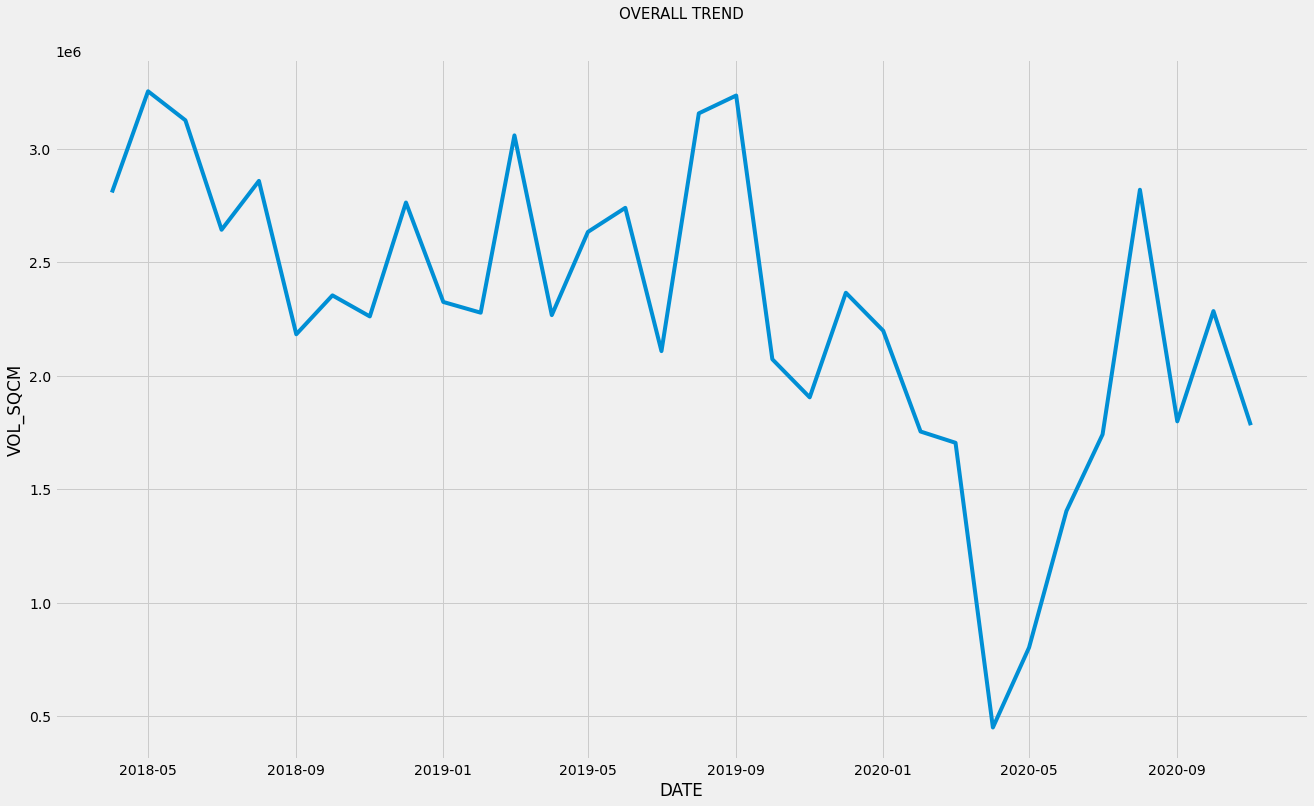

In [59]:
#Now we will plot the overall trend of data.

plt.figure(figsize=(20,12))
plt.title('OVERALL TREND', y=1.05, size=15)
plt.style.use('fivethirtyeight')
sns.lineplot(x="DATE",y="VOL_SQCM",data=df_group_one,dashes=True)


In [54]:
df_group_two = df.groupby(['PUBLICATION','DATE'],as_index=False).sum()

In [55]:
df_group_two.head()

,PUBLICATION,DATE,VOL_SQCM
0,PLAYER 1,2018-04-01,1097333
1,PLAYER 1,2018-05-01,1377166
2,PLAYER 1,2018-06-01,1201296
3,PLAYER 1,2018-07-01,1064081
4,PLAYER 1,2018-08-01,1211739


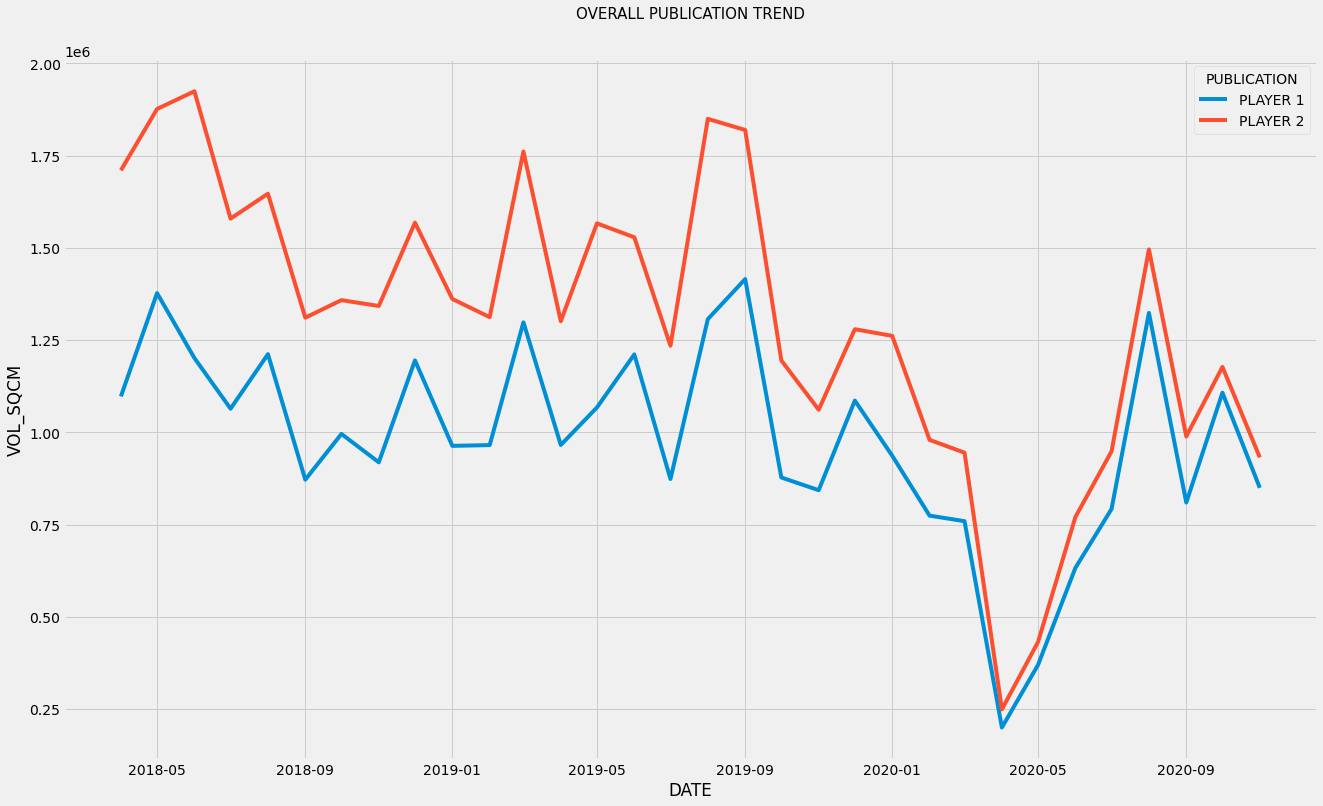

In [58]:
#Now we will plot the Overall Trend in terms of PUBLICATIONS
plt.figure(figsize=(20,12))
plt.title('OVERALL PUBLICATION TREND', y=1.05, size=15)
plt.style.use('fivethirtyeight')
sns.lineplot(x="DATE",y="VOL_SQCM",data=df_group_two,hue="PUBLICATION")

**PLAYER 1 SUPER CATEGORY** 

In [60]:
df_group_three = df.groupby(['PUBLICATION','SUPER CATEGORY'],as_index=False).sum()

In [62]:
df_group_three.head()

,PUBLICATION,SUPER CATEGORY,VOL_SQCM
0,PLAYER 1,Agriculture,2840
1,PLAYER 1,Alcoholic Drinks,64
2,PLAYER 1,Auto,6193382
3,PLAYER 1,Babycare,3286
4,PLAYER 1,Banking/Finance/Investment,1613359


In [91]:
df_player1 = df_group_three.loc[df_group_three["PUBLICATION"]=="PLAYER 1"]

In [92]:
df_player1.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_player1 = df_player1.head(12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


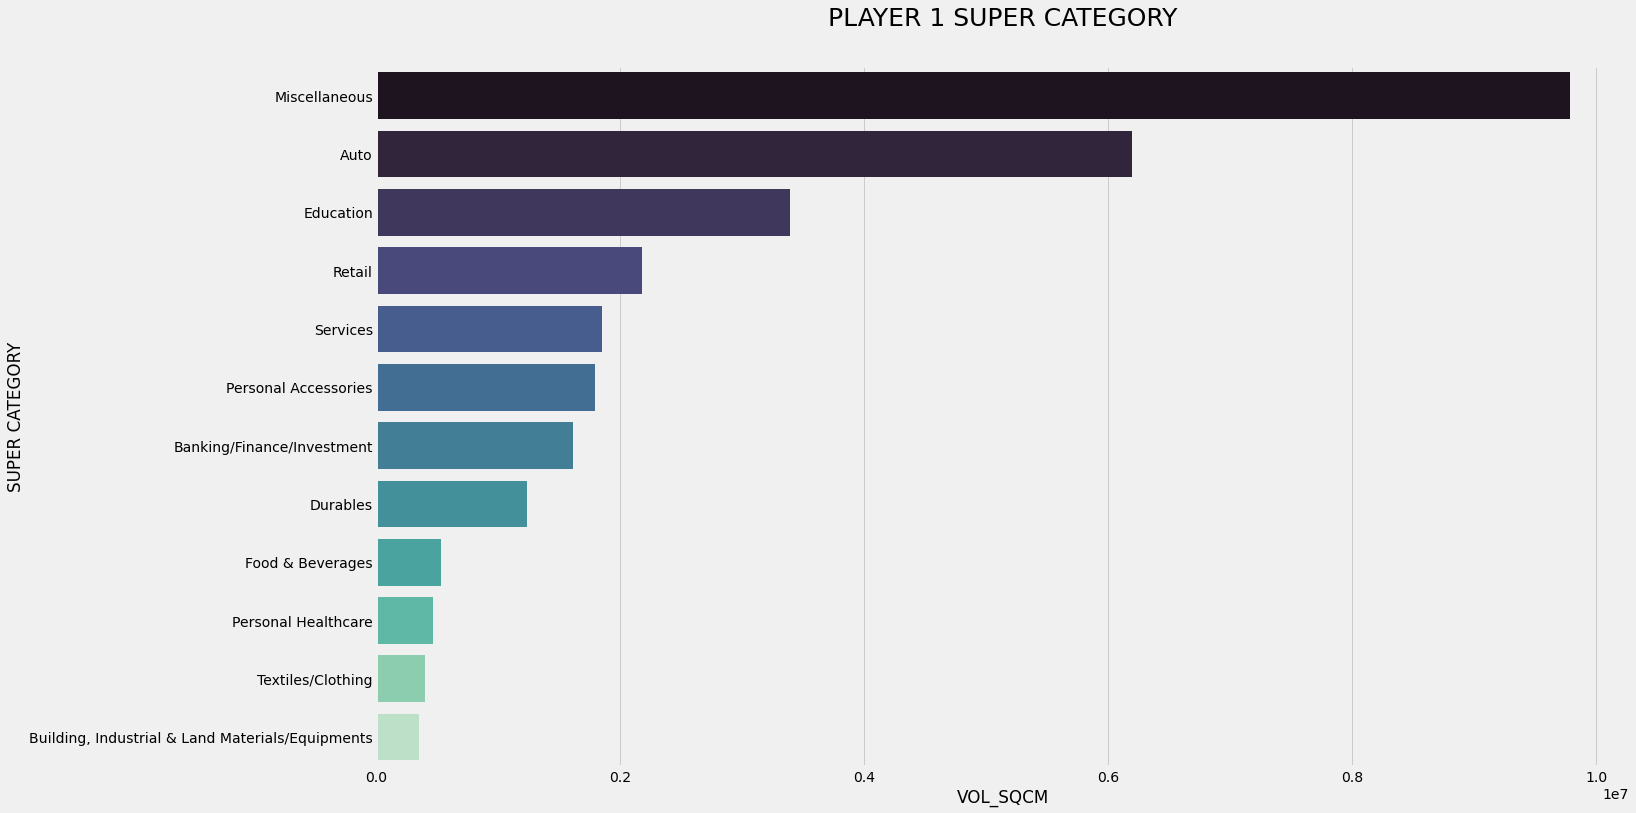

In [99]:
plt.figure(figsize=(20,12))
plt.title('PLAYER 1 SUPER CATEGORY', y=1.05, size=25)
sns.barplot(x="VOL_SQCM",y="SUPER CATEGORY",data=df_player1,palette="mako")

 **PLAYER 2 SUPER CATEGORY**

In [100]:
df_player2 = df_group_three.loc[df_group_three["PUBLICATION"]=="PLAYER 2"]
df_player2.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_player2 = df_player2.head(12)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


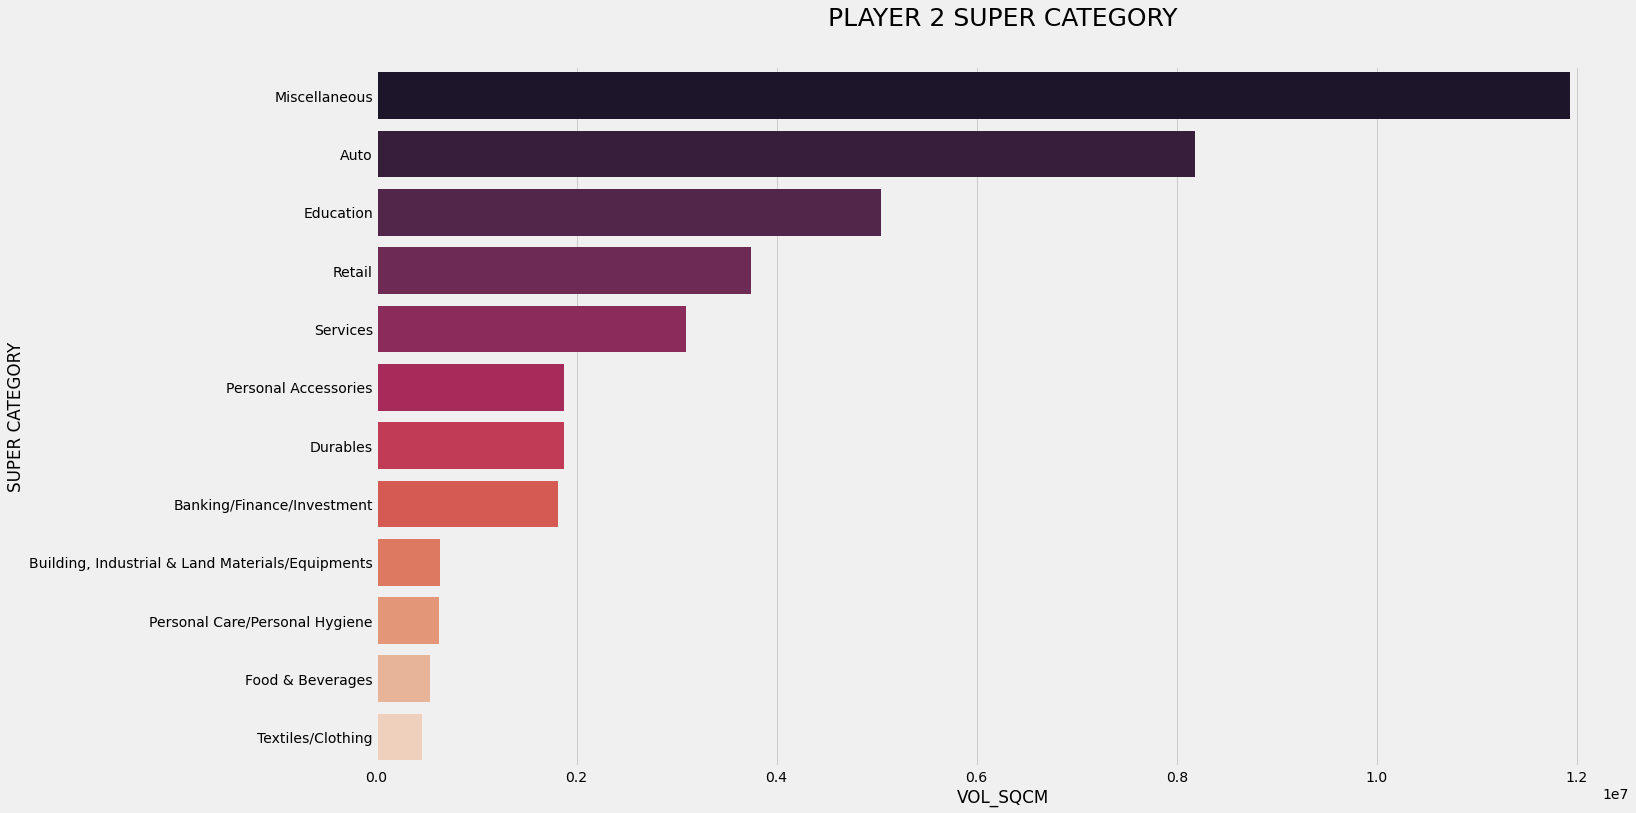

In [121]:
plt.figure(figsize=(20,12))
plt.title('PLAYER 2 SUPER CATEGORY', y=1.05, size=25)
sns.barplot(x="VOL_SQCM",y="SUPER CATEGORY",data=df_player2,palette="rocket")

**PLAYER 1 ADVERTISERS**

In [106]:
df_group_four = df.groupby(['PUBLICATION','ADVERTISER'],as_index=False).sum()

In [107]:
df_group_four.head()

,PUBLICATION,ADVERTISER,VOL_SQCM
0,PLAYER 1,1 To 1 Home Tutors,20
1,PLAYER 1,18 Am Padi Construction,195
2,PLAYER 1,24 Mantra Organic,120
3,PLAYER 1,2d Entertainment,1232
4,PLAYER 1,3-Son Motor Driving Sch,80


In [109]:
df_player1a = df_group_four.loc[df_group_four["PUBLICATION"]=="PLAYER 1"]
df_player1a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_player1a = df_player1a.head(19)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

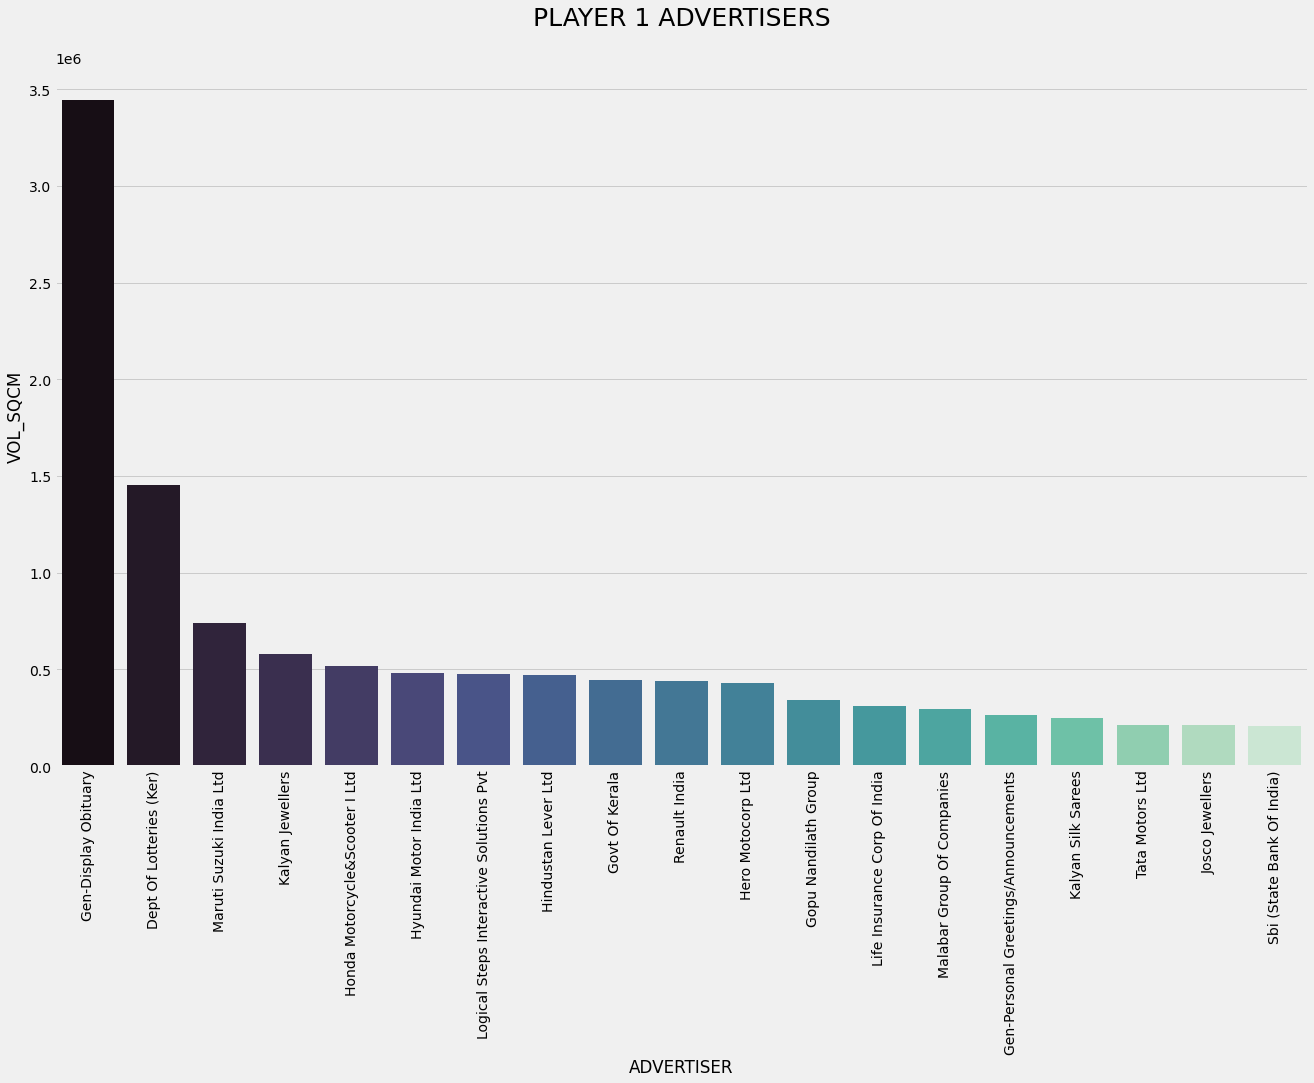

In [118]:
plt.figure(figsize=(20,12))
plt.title('PLAYER 1 ADVERTISERS', y=1.05, size=25)
sns.barplot(x="ADVERTISER",y="VOL_SQCM",data=df_player1a,palette="mako")
plt.xticks( rotation=90)


**PLAYER 2 ADVERTISERS**

In [119]:
df_player2a = df_group_four.loc[df_group_four["PUBLICATION"]=="PLAYER 2"]
df_player2a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_player2a = df_player2a.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

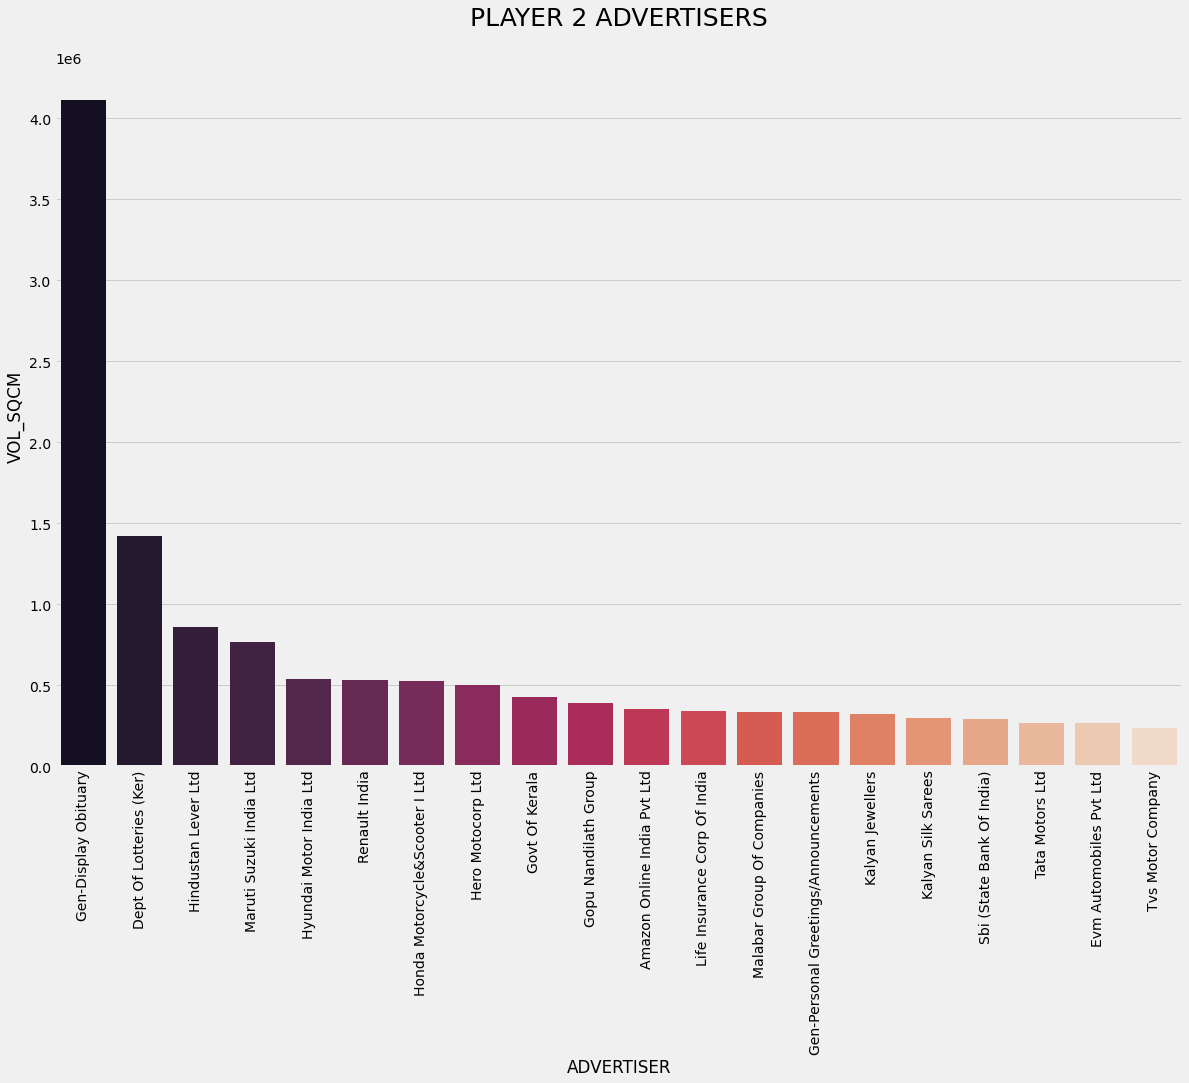

In [120]:
plt.figure(figsize=(18,12))
plt.title('PLAYER 2 ADVERTISERS', y=1.05, size=25)
sns.barplot(x="ADVERTISER",y="VOL_SQCM",data=df_player2a,palette="rocket")
plt.xticks( rotation=90)

# **PLAYER 1 2020 TREND**

In [127]:
#Filter the Dataset by 2020
df_2020 = df.loc[df["DATE"]>"2019-12-01"]

In [133]:
#Now filter data by Player 1
df_2020_1 =df_2020.loc[df_2020["PUBLICATION"]=="PLAYER 1"]
df_2020_1.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM,DATE
4978,Apr - 2020,Banking/Finance/Investment,Banking-services & Products,The Federal Bank,Ppb PLAYER 1/Federal Bank,PLAYER 1,Color,3228,2020-04-01
4980,Apr - 2020,Banking/Finance/Investment,Bonds,Kosamattam Finance Pvt Ltd,Kosamattam Finance-Ncd,PLAYER 1,Color,4285,2020-04-01
4983,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Csb Bank Ltd,Csb Bank Loans Agn Gold,PLAYER 1,Color,408,2020-04-01
4984,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Kollam Coop Urban Bank,Kollam Coop Loan Against Gold,PLAYER 1,Black & White,40,2020-04-01
4986,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Ksfe,Ksfe Loan Against Gold,PLAYER 1,Color,404,2020-04-01


In [139]:
df_1_2020trend = df_2020_1.groupby(['DATE','SUPER CATEGORY'],as_index=False).sum()

In [140]:
df_1_2020trend.head(6)

,DATE,SUPER CATEGORY,VOL_SQCM
0,2020-01-01,Auto,169013
1,2020-01-01,Banking/Finance/Investment,35428
2,2020-01-01,"Building, Industrial & Land Materials/Equipments",2956
3,2020-01-01,Computers,400
4,2020-01-01,Corporate/Brand Image,3565
5,2020-01-01,Durables,12293


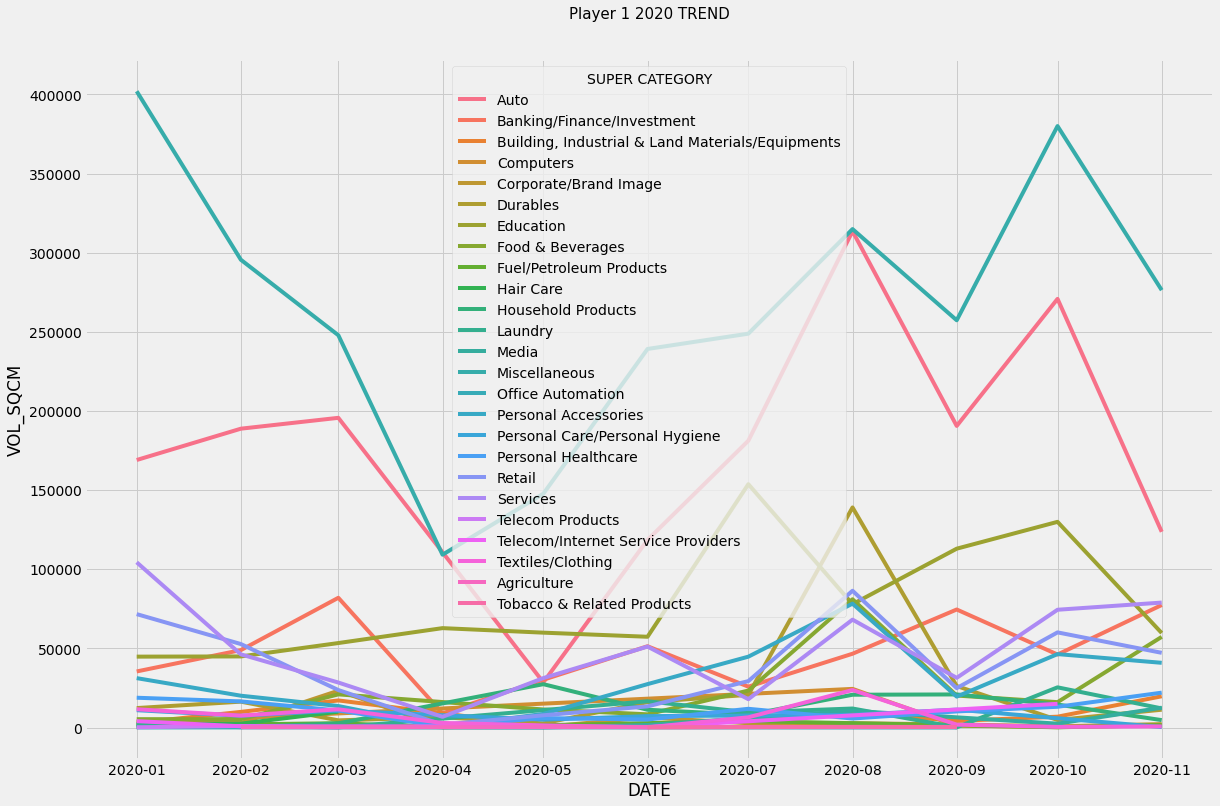

In [141]:
plt.figure(figsize=(18,12))
plt.title('Player 1 2020 TREND', y=1.05, size=15)
sns.lineplot(x="DATE",y="VOL_SQCM",data=df_1_2020trend,hue="SUPER CATEGORY")

**PLAYER 1 AUTO SUPER CATEGORY - ADVERTISERS LIST**

In [142]:
df_2020_1_auto = df_2020_1.loc[df_2020_1["SUPER CATEGORY"]=="Auto"]

In [152]:
df_2020_1_auto_a = df_2020_1_auto.groupby(['ADVERTISER'],as_index=False).sum()

In [159]:
df_2020_1_auto_a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_2020_1_auto_a[:20]

,ADVERTISER,VOL_SQCM
75,Maruti Suzuki India Ltd,203008
48,Honda Motorcycle&Scooter I Ltd,146019
109,Renault India,142281
50,Hyundai Motor India Ltd,112147
133,Tata Motors Ltd,111986
58,Kia Motors Corporation,106224
132,Suzuki Motorcycle India P Ltd,85358
46,Hero Motocorp Ltd,84925
127,Skoda Auto,63589
47,Honda Cars India Ltd,53043


**PLAYER 1 EDUCATION SUPER CATEGORY - ADVERTISERS LIST**

In [160]:
df_2020_1_edu = df_2020_1.loc[df_2020_1["SUPER CATEGORY"]=="Education"]

In [161]:
df_2020_1_edu_a = df_2020_1_edu.groupby(['ADVERTISER'],as_index=False).sum()

In [163]:
df_2020_1_edu_a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_2020_1_edu_a[:15]

,ADVERTISER,VOL_SQCM
466,Logical Steps Interactive Solutions Pvt,144160
376,Jain Group Of Inst,34557
922,Think & Learn Pvt Ltd,32737
109,Brilliant Study Centre,32553
4,Aakash Educational Services Ltd,29952
37,Allen Career Inst,25905
272,G-Tec Computer Education,22400
1012,Zephyr Coaching,20297
50,Amrita Vishwa Vidyapeetham,18637
947,Universal Institute (Kottakkal),16738


# **PLAYER 2 2020 TREND**

In [168]:
#Filter the data by Player 2
df_2020_2 =df_2020.loc[df_2020["PUBLICATION"]=="PLAYER 2"]

In [169]:
df_2020_2.head()

,PERIOD,SUPER CATEGORY,PRODUCT GROUP,ADVERTISER,PRODUCT,PUBLICATION,AD TYPE(CLR/BW),VOL_SQCM,DATE
4977,Apr - 2020,Banking/Finance/Investment,Banking-anywhere Banking,Canara Bank,Canara Bank Digital Banking,PLAYER 2,Color,2420,2020-04-01
4979,Apr - 2020,Banking/Finance/Investment,Bonds,Kosamattam Finance Pvt Ltd,Kosamattam Finance-Ncd,PLAYER 2,Color,4199,2020-04-01
4981,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Adhyapaka Urban Coop Bank Ltd,Adhyapaka Urban Ashwas Gold Loan,PLAYER 2,Black & White,120,2020-04-01
4982,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Csb Bank Ltd,Csb Bank Loans Agn Gold,PLAYER 2,Color,400,2020-04-01
4985,Apr - 2020,Banking/Finance/Investment,Loans-mortgage,Ksfe,Ksfe Loan Against Gold,PLAYER 2,Color,400,2020-04-01


In [170]:
df_2_2020trend = df_2020_2.groupby(['DATE','SUPER CATEGORY'],as_index=False).sum()

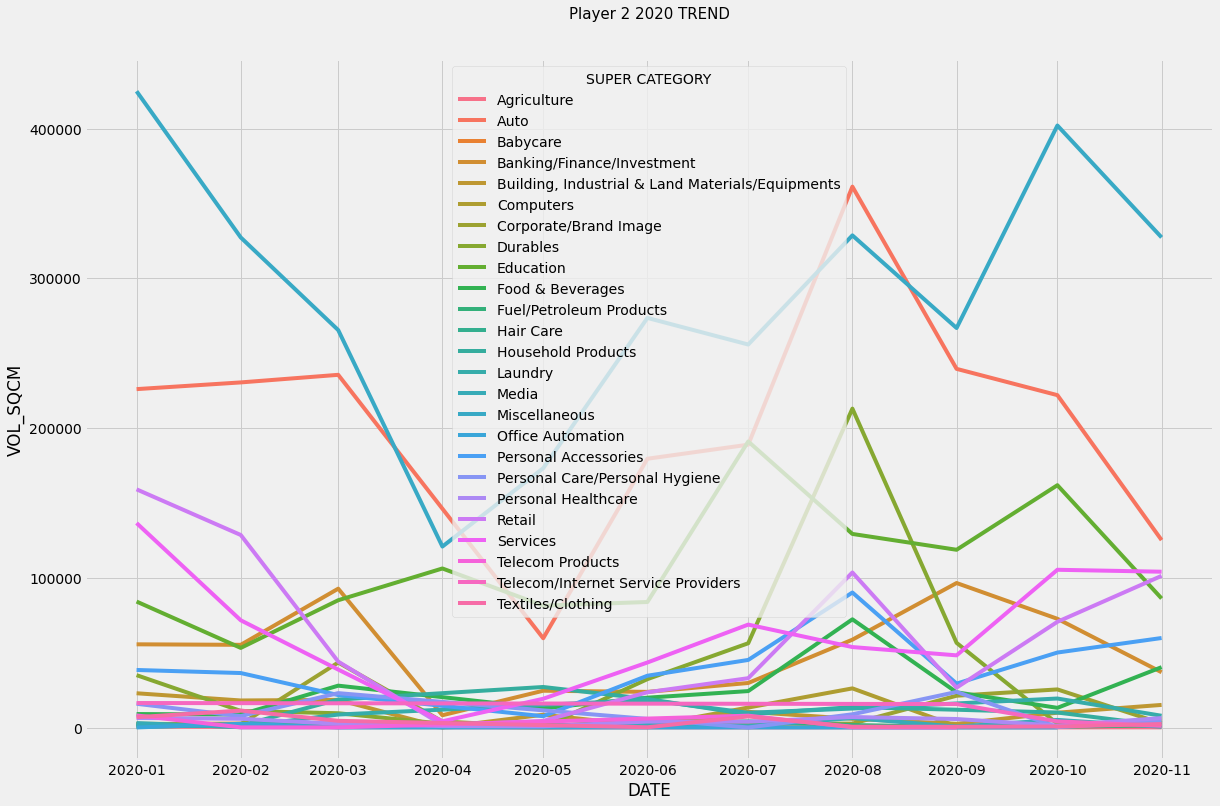

In [171]:
plt.figure(figsize=(18,12))
plt.title('Player 2 2020 TREND', y=1.05, size=15)
sns.lineplot(x="DATE",y="VOL_SQCM",data=df_2_2020trend,hue="SUPER CATEGORY")

**PLAYER 2 EDUCATION SUPER CATEGORY - ADVERTISERS LIST**

In [173]:
df_2020_2_edu = df_2020_2.loc[df_2020_2["SUPER CATEGORY"]=="Education"]
df_2020_2_edu_a = df_2020_2_edu.groupby(['ADVERTISER'],as_index=False).sum()
df_2020_2_edu_a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_2020_2_edu_a[:20]


,ADVERTISER,VOL_SQCM
4,Aakash Educational Services Ltd,97688
1343,Think & Learn Pvt Ltd,64218
549,Jain Group Of Inst,56581
534,Intl Skill Devp Corp Ltd,47289
79,Amrita Vishwa Vidyapeetham,31820
178,Brilliant Study Centre,31476
378,Fortune Ias Academy (Tvm),27903
874,Nehru Clg Of Edu & Charitable Trust,22941
1365,Tuv Rheinland Nife Academy Pvt Ltd,20608
1225,St Gregorious Inst Of Tech & Science,19423


**PLAYER 2 BANKING SUPER CATEGORY - ADVERTISERS LIST**

In [174]:
df_2020_2_bnk = df_2020_2.loc[df_2020_2["SUPER CATEGORY"]=="Banking/Finance/Investment"]
df_2020_2_bnk_a = df_2020_2_bnk.groupby(['ADVERTISER'],as_index=False).sum()
df_2020_2_bnk_a.sort_values(["VOL_SQCM"],ascending=False,inplace=True)
df_2020_2_bnk_a[:20]

,ADVERTISER,VOL_SQCM
119,Life Insurance Corp Of India,121800
203,Sbi (State Bank Of India),83116
144,Muthoot Financial Enterprises,52306
9,Amfi (Asso Of Mutual Funds In India),41941
145,Muthoot Fincorp Ltd,32987
26,Canara Bank,22913
147,Muthoottu Mini Finance (P)ltd,13512
104,Kosamattam Finance Pvt Ltd,12538
261,Yes Bank Ltd,11357
110,Ksfe,11318
